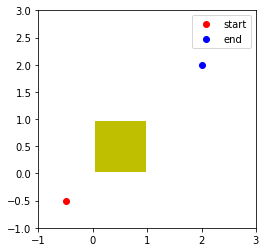

In [58]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

fig, ax = plt.subplots()
s, =plt.plot([-0.5], [-0.5], 'ro')
e, =plt.plot([2.0], [2.0], 'bo')
o, =plt.plot([0.5], [0.5], 'ys', markersize=50)
ax.set_aspect('equal', 'box')
ax.set_xlim(-1, 3)
ax.set_ylim(-1, 3)
handles, labels = ax.get_legend_handles_labels()
ax.legend([s, e], ['start', 'end'])
# plt.show()
plt.savefig("Yixuan_chap10_fig13_1.png")

In [64]:
n = 4001
x = np.linspace(-1, 3, n)
y = np.linspace(-1, 3, n)
xv, yv = np.meshgrid(x, y)
inside = np.logical_and(np.logical_and(xv < 1, xv > 0), np.logical_and(yv < 1, yv > 0))

In [65]:
k_att = 1.
P_att = 0.5*k_att*((xv-2)**2+(yv-2)**2)

In [66]:
dist = np.zeros_like(xv)
# dist[np.logical_and((xv>1, yv>1))] = xv
dist = np.sqrt((xv-0.5)**2+(yv-0.5)**2)-0.5

In [101]:
k_rep = 1.0
rho_0 = 1.0
P_rep = np.zeros_like(dist)
delta = 0.2
P_rep[np.logical_and(dist>=delta, dist<=rho_0)] = 0.5*k_rep*(1/dist[np.logical_and(dist>=delta, dist<=rho_0)]-1/rho_0)**2
print(P_rep.max())
P_rep[dist<delta] = float('NaN')
P_rep[dist>rho_0] = 0

7.999999999999982


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  


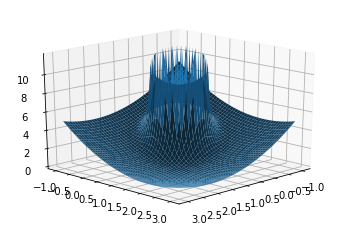

In [102]:
pot_fig, pot_ax = plt.subplots(subplot_kw={"projection": "3d"})
surf=pot_ax.plot_surface(xv, yv, P_rep+P_att)
pot_ax.view_init(elev=20., azim=45)
plt.savefig("Yixuan_chap10_fig13_2.png")

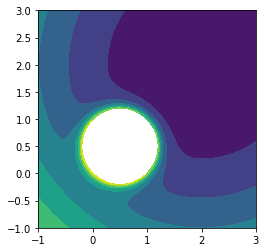

In [103]:
fig, ax = plt.subplots()
ax.contourf(xv, yv, P_rep+P_att)
ax.set_aspect('equal', 'box')
ax.set_xlim(-1, 3)
ax.set_ylim(-1, 3)
plt.show()

In [104]:
xv.shape

(4001, 4001)